# Ionosphere Data Prediction

This notebook focuses on analyzing and predicting radar signals from Goose Bay for the Ionosphere Data Problem. Through a detailed examination of the dataset, the goal is to identify patterns that distinguish between 'Good' and 'Bad' ionospheric returns.

## Importing Libraries

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, r2_score, confusion_matrix


## Loading the Dataset

In [24]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
#Loading the dataset
df = pd.read_csv("/kaggle/input/ionosphere-data-problem/ionosphere_data.csv")
df.head(5)

/kaggle/input/ionosphere-data-problem/ionosphere_data.csv


,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


## Dataset Exploration

In [25]:
df.shape

(351, 35)

In [26]:
df.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,...,0.396135,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480
std,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,...,0.578451,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,...,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,...,0.553890,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,...,0.905240,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
# Checkin for null values

df.isnull().sum()

feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64

In [28]:
# Checking the data type of the features

for i in df.columns.tolist():
    print(df[i].dtype)

int64
int64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
object


In [29]:
# Determining the name of the feature with object dtype

df.select_dtypes(include = object).columns.tolist()


['label']

In [30]:
# Checking out for duplicate entries

df[df.duplicated()]

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
248,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,b


## Data Cleaning

In [31]:
# Deleting the duplicate rows

df.drop_duplicates(inplace=True)

In [32]:
#Converting the dtype of feature1 and feature2 to float64

df['feature1'] = df.feature1.astype('float64')
df['feature2'] = df.feature2.astype('float64')

In [33]:
# Encoding the 'label' feature

df['label'] = df['label'].replace({'g':1,'b':0})

/tmp/ipykernel_34/4212232702.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['label'] = df['label'].replace({'g':1,'b':0})


In [34]:
df['label']

0      1
1      0
2      1
3      0
4      1
      ..
346    1
347    1
348    1
349    1
350    1
Name: label, Length: 350, dtype: int64

In [35]:
## Checking the correlation of the features with 'label'

df.corr()['label'].sort_values()[:-1]

feature22   -0.116744
feature27   -0.108110
feature34   -0.064451
feature32   -0.036068
feature30   -0.003741
feature26    0.002082
feature24    0.006626
feature20    0.035889
feature28    0.036531
feature17    0.084960
feature19    0.115591
feature10    0.119530
feature18    0.119679
feature4     0.125823
feature6     0.148530
feature16    0.148566
feature12    0.159171
feature11    0.165267
feature13    0.179785
feature25    0.186167
feature14    0.196832
feature23    0.202688
feature15    0.205793
feature8     0.207213
feature21    0.218124
feature29    0.248311
feature33    0.259430
feature9     0.292165
feature31    0.292966
feature7     0.448103
feature1     0.461280
feature5     0.514353
feature3     0.516765
label        1.000000
Name: label, dtype: float64

In [36]:
# Droping the features with little to no correlation

drop_columns = ['feature34','feature32','feature30', 'feature26', 'feature24','feature20', 'feature28','feature17']

df.drop(columns = drop_columns, inplace =True)

## Model Training

In [37]:
# Splitting the dataset into train and test sets

x = df.drop(columns = ['label'])
y = df['label']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 23)

In [38]:
# Standardizing the features

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Random Forest Classifier

In [39]:
# Training the Random Forest Classifer model

model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)

RandomForestClassifier()

In [40]:
# Predicitng the values on x_test

predict = model_rf.predict(x_test)

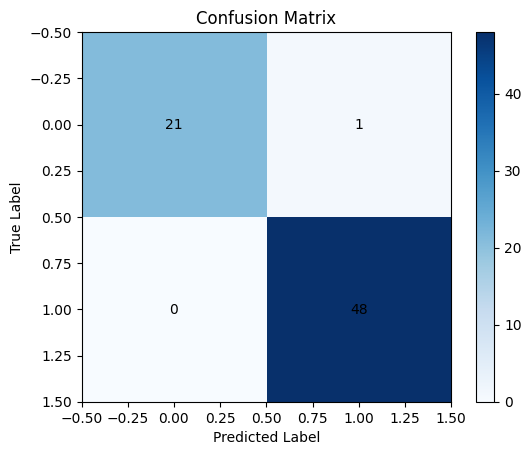

In [41]:
# Plotting the confusion matrix with labels

cm = confusion_matrix(y_test, predict)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels to each box
num_classes = len(np.unique(y_test))
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, cm[i, j], ha='center', va='center')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [42]:
# Printing out the evaluation metrics

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predict)

TN, FP, FN, TP = confusion_matrix(y_test, predict).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)



True Positive(TP)  =  48
False Positive(FP) =  1
True Negative(TN)  =  21
False Negative(FN) =  0


In [43]:
# Determining the accuracy of the model

accuracy =  (TP + TN) / (TP + FP + TN + FN)

print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

Accuracy of the binary classifier = 0.986


### Logistic Regression

In [44]:
# Training the Logistic Regression Model

model_lr = LogisticRegression()
model_lr.fit(x_train,y_train)

LogisticRegression()

In [45]:
predict = model_lr.predict(x_test)

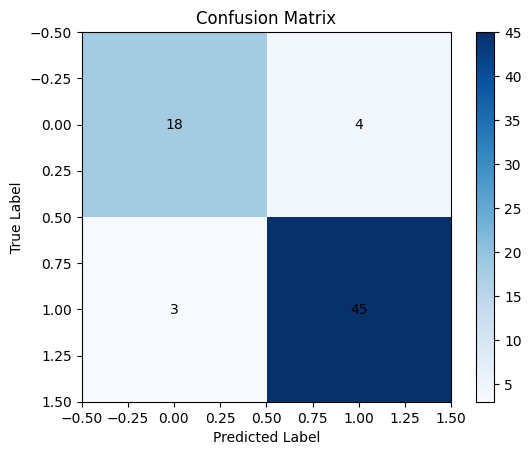

In [46]:
# Plotting the confusion matrix with labels

cm = confusion_matrix(y_test, predict)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels to each box
num_classes = len(np.unique(y_test))
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, cm[i, j], ha='center', va='center')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [47]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predict)

TN, FP, FN, TP = confusion_matrix(y_test, predict).ravel()

print('True Positive: ', TP)
print('True Negative: ', TN)
print('False Positive: ', FP)
print('False Negative: ', FN)

True Positive:  45
True Negative:  18
False Positive:  4
False Negative:  3


In [48]:
accuracy = (TP + TN)/(TP+TN+FP+FN)
print("Accuracy of the Logisic Regression Model: ", accuracy)

Accuracy of the Logisic Regression Model:  0.9
